In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="<font color='blus'>Algorithmic complexity</font>")

# <font color='blus'>Imports

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
# modules de bases
import os
import sys
import copy

# numpy, scipy, pandas
import numpy as np
import scipy.special as sp
import pandas as pd
import random

from timeit import Timer

# pour la visualisation
from IPython.display import display
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
# plotly
# seaborn
# altair

import random as rd

# <font color='blus'>Complexity theory

> 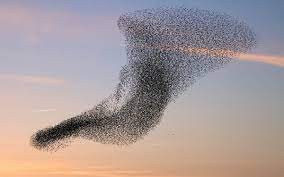

> A system composed of a large number of interacting components, without central control, whose emergent "global'' behavior—described in terms of dynamics, information processing, and/or adaptation —is more complex than can be explained or predicted from understanding the sum of the behavior of the individual components. 
>
> Complex systems are generally capable of adapting to changing inputs/environment and in such cases sometimes referred to as complex adaptive systems.

> 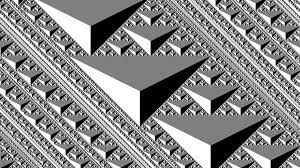

> *Theory of cellular automaton*

>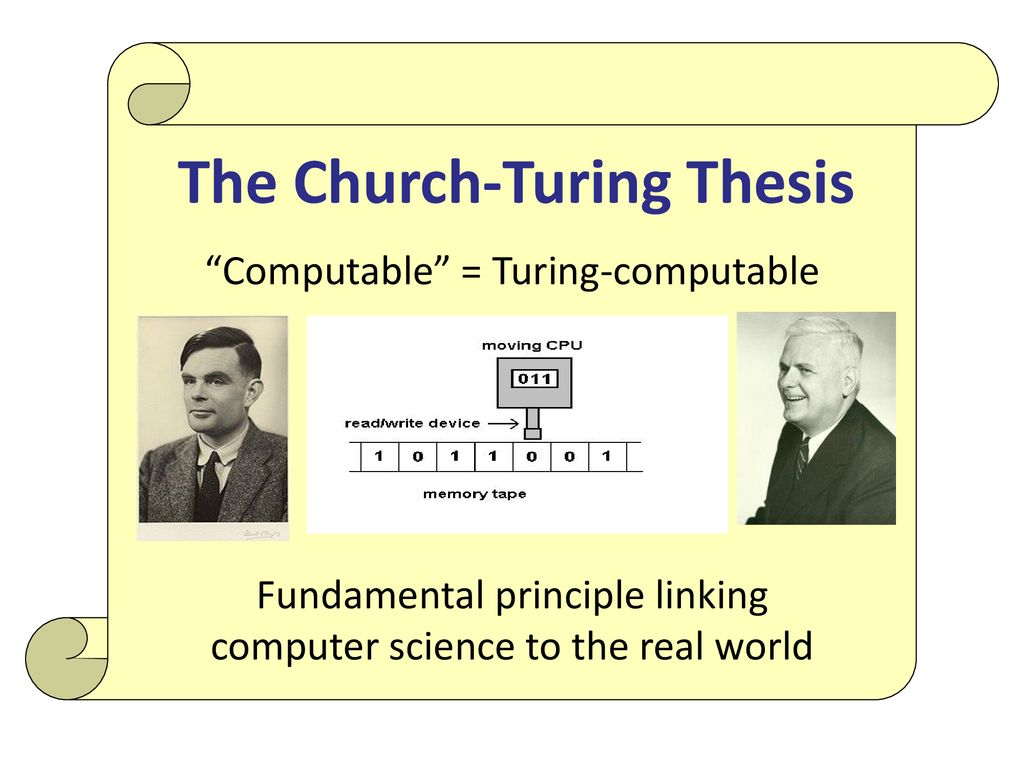

> The Church-Turing thesis : 
>
>**Any function that is "computable" -- that is, that can be computed by an algorithm -- can be computed by a universal Turing machine**

> It is a branch of theoretical computer science.
>
> This branch deals with the necessary resources, memory and time, to compute an algorithmic problem.
>
> Problems are classified into complexity classes: P, NP, ...
>
> Measuring complexity allows to adapt resources to computers tasks and optimize algorithms.
>
> In this course, we will focus on **time** resource. We use a kind of algorithm, particularly adapted to measure this quantity, both the **searching** and **sorting** algorithms.
>

# <font color='blus'>Algorithms over `Python` lists

**Note**: to teach algorithms and illustrate fundamental notions like algorithmic complexities, it is probably better to break python's best practices and avoid its idioms, in short, to use python as a low level programming language.


**Search for an item in a list**

See the [doc](https://ipython.readthedocs.io/en/stable/interactive/magics.html) for the `%time` magic command.

>> `%%time` is a so-called "magic" command of `IPython`.
>>
>> For the whole cell, `%%time` displays the CPU time and the wait time for the result.
>>
>> `%time` displays the CPU time and the wait time for the result of a single statement line.

> The list comprehension below generates a list of 1 million pseudo-random values, ranging from 1 to 10001

In [5]:
%%time
import random as rd
n = int(1e6)
p = int(1e4)
liste_test = [rd.randint(0,p)+1 for _ in range(n)]
print(len(liste_test))

1000000
CPU times: total: 1.55 s
Wall time: 1.54 s


> **User CPU time** is the amount of time the processor spends in running application / Python code.
>
> **System CPU Time** is the amount of time the processor spends in running the operating system(i.e., kernel), system libraries.

In [6]:
print(liste_test[:10]) 
min(liste_test), max(liste_test), len(liste_test)

[886, 4881, 4750, 1050, 1766, 3546, 5953, 1349, 6001, 4212]


(1, 10001, 1000000)

In [7]:
liste_test.index(7010), liste_test.index(5926), liste_test[-1]

(5325, 6530, 9286)

## <font color='blus'>Searching for an item in a list

> For each value of the list, we retrieve the corresponding index in the list and we thus build the list of indexes.
>
> In the example below, the index associated with the value `'e'` of the list `list_` is `4`.

In [8]:
list_ = ['a', 'b', 'c', 'd', 'e']
print(list_)
list_.index('e')
list_index = [list_.index(l) for l in list_]#
max_index = max(list_index)

element = list_index.index(max_index)# 
print(element, max_index)

['a', 'b', 'c', 'd', 'e']
4 4


In [9]:
list_.index(list_[-1])

4

In [10]:
p

10000

In [11]:
list_index = [liste_test.index(l) for l in range(1,p+1)]
max_index = max(list_index)# Get greater index in the list
element = list_index.index(max_index)# Then we retrieve the value in the list for this index
element

1239

In [12]:
print(list_index[:10])
max_index

[537, 1024, 1297, 448, 185, 34843, 7922, 4516, 1337, 1146]


111678

### <font color='blus'> Naive search

> We go through all the elements of the list and we compare them one by one with the element we are looking for.
>
> A test (`if` control structure) is made on each of the elements

In [13]:
def naive_search(liste,elt):
    for i in range(len(liste)):
        if liste[i] == elt:
            return i
    return -1

> The `%time` statement applies to the cell line.

In [14]:
%time naive_search(liste_test,element)

CPU times: total: 0 ns
Wall time: 0 ns


4995

> In programming, a test (`if` statement)consumes several processor cycles. This is a costly statement that we avoid inserting in a loop (`for`).

### <font color='blus'> Search with the `enumerate` function

In [15]:
def enumerate_search(liste,elt):
    for i,item in enumerate(liste):
        if item == elt:
            return i
    return -1

In [16]:
%time enumerate_search(liste_test,element)

CPU times: total: 0 ns
Wall time: 0 ns


4995

> Algorithm implemented into `enumerate_search` function is more optimized than our naive search. This is due to the fact that in naive search, a memory access is performed in the list (`list[i]`) and this access is more expensive than going through the native `enumerate` function to retrieve the elements of the list.
>
> Indeed the memory address `list[i]` must be recalculated at each iteration, which consumes several processor cycles.
>
> **NB : When you need an algorithm, make sure that it has not still alerady been implemented in some Python library.** Native algorithms are often higly optimized.

### <font color='blus'> Searching with the `index` method of the list

In [17]:
def recherche_index(liste,elt):
    return liste.index(elt)

In [18]:
%time recherche_index(liste_test,element)

CPU times: total: 0 ns
Wall time: 0 ns


4995

> - No loop is used in the search program.
>
> - The element's memory address is calculated and accessed only once.
>
> - No test is done, which saves processor cycle time and highlights, by the way, the cost of an `if` test.
>
> Note that the methods of the classes are optimized in the `C` language. Most algorithms in `Python` are
underlyingly written in the `C` language. The latter is a so-called **low level** language in the sense that it is necessary to understand the organization of the memory of a processor in order to code efficiently.
>
> The level of `C` language is just above assembly language.

### <font color='blus'> Searching in a list using recursion algorithm

> A recursive function is related to recurrent sequences, such as:
>> $U_{n+1} = 2U_n +3$
>
> The recursive function calls itself.

In [19]:
def recursive_search(liste,elt,index=0):
    if liste[0] == elt:
        return index;
    else:
        # Proceed to recursion over the list where 1st element has been removed.
        return recursive_search(liste[1:],elt,index+1)

In [20]:
if False :
    %time recursive_search(liste_test,element)

> The time and resources required to solve an algorithmic problem vary according to the algorithm used.
>
> Enabling recursive search will crash the `Python` kernel, in the sense that the call stack that uses RAM memory will be full before it can exit the recursive process.

> The function below gives the limit depth of recursions.
>
> Using `set` assessor allows to upgrade this limit.
>
> Then, this limit can be changed, but it is not recommended: `sys.setrecursionlimit(124000)`
>
> Using `sys` API (Application Programming Interface), we reach the `system programming` level.

In [24]:
import sys
print(sys.getrecursionlimit())

3000


> To avoid the problem of memory saturation, we will truncate the original list and search for the element at the last index, means, the last position in the list

In [25]:
len(liste_test)
liste_test_troncated = liste_test[:10000]
print(len(liste_test_troncated))
element = liste_test_troncated[-1]
print(element)

10000
7588


In [ ]:
%%time 
id = recursive_search(liste_test_troncated,element)
print(liste_test_troncated[id])

> **For a list 100 times smaller, the algorithm time is multiplied by a factor of 100 000.**

In [1]:
# # on peut changer cette limite, mais cela n'est pas recommandé
# sys.setrecursionlimit(124000)

# <font color='blus'>Using data structures under `numpy`

Avec numpy:

> `numpy` is an abbreviation of numerical python. It is a library dedicated to scientific programming.
>
> `numpy` allows you to manipulate, among other things, arrays (vectors in the mathematical sense of the term), matrices (bilinear forms), tensors (multilinear forms), statistics, probabilities.
>
> `numpy` covers areas the `scipy` lib covers.
>
> With `pandas`, `numpy` is one of the most widely used libraries in datascience.
>
> In the following examples, lists are converted to tables.

In [21]:
import numpy as np # notez que, par convention, l'alias de numpy est np.

In [22]:
%time test_nparray = np.asarray(liste_test)

CPU times: total: 62.5 ms
Wall time: 65.7 ms


## <font color='blus'>Generate an array under `numpy`

> An array of type int, with one dimension, n, is generated with random numbers between 1 and 1000.

In [23]:
%%time
n = int(1e6)
test_nparray2 = np.fromfunction(np.vectorize(lambda i: rd.randint(0, 1000)+1), (n,), dtype=int)

CPU times: total: 1.42 s
Wall time: 1.42 s


## <font color='blus'>Find an element with the `where` method of a `numpy` array

In [24]:
%time np.where(test_nparray == element)

CPU times: total: 0 ns
Wall time: 3.79 ms


(array([  4995,   6099,  15941,  17849,  31648,  41892,  69978,  84134,
         86795,  92387,  93154, 110105, 120439, 150012, 167512, 169008,
        178845, 189014, 198906, 199865, 204475, 213966, 243621, 255397,
        261669, 278668, 283242, 295507, 298456, 328286, 346618, 358103,
        373378, 403647, 406441, 409533, 410521, 445399, 452382, 460397,
        470261, 477312, 504773, 531976, 535113, 562684, 576436, 587234,
        593604, 609265, 629323, 655255, 660282, 662805, 663578, 664893,
        693559, 699735, 702911, 705449, 716280, 722413, 776412, 786123,
        804230, 809274, 811089, 814395, 830382, 832313, 840637, 847084,
        850210, 856720, 857369, 858651, 872626, 889601, 909950, 924056,
        957500, 964864, 973243, 990574], dtype=int64),)

> We have retrieved the list of all the indices from the array `test_nparray`.
>
> These indices corresponds with the value of `element`.
>
> Note the similarity of the `where` keyword with the languages of the `SQL` family.

In [25]:
print(test_nparray[966692], element)
print(test_nparray[877119], element)

889 1239
1362 1239


> The `shape` property below gives the dimensions of the array, here to an input.

In [26]:
test_nparray.shape[0]

1000000

In [27]:
np.where(test_nparray == element)[0].shape

(84,)

In [28]:
len(np.where(test_nparray == element)[0])

84

> `np.where` returns a tuple whose first index gives the list of array indices corresponding to the sought element.

## <font color='blus'>Find an element with an iterator from a `numpy` array

> In the next cell, we define an iterator on the array.
>
> An iterator is an object acting as a cursor, which will point to the different indices of a sequence of values or objects. The pointer traverses the addresses of the elements step by step.
>
> An iterator is **inexpensive in memory** and is more general purpose than a list.
>
> The `nd` stem is a contraction of "N-Dimensionnal" and emphasizes numpy's ability to handle multi-dimensional objects, such as matrices.

In [29]:
print(element)
element in test_nparray

1239


True

In [30]:
iterator = np.nditer(test_nparray,flags=['f_index'])
iterator.iternext()

True

In [31]:
%%time
list_index = list()

iterator = np.nditer(test_nparray,flags=['f_index'])
while iterator.iternext():
    if iterator[0] == element:
        list_index.append(iterator.index)


CPU times: total: 1.25 s
Wall time: 1.25 s


In [32]:
len(list_index), len(np.where(test_nparray ==element)[0])

(84, 84)

In [33]:
iterator.iternext()

False

## <font color='blus'>Dichotomous search in a `numpy` array

> 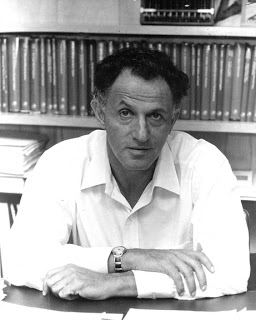

> Here-under is a **dynamic programming** representation of the bubble sort algorithm
>
> (wikipedia)
>> Dynamic programming is both a mathematical optimization method and a computer programming method. The method was developed by **Richard Bellman** (applied mathematician) in the 1950s and has found applications in numerous fields, from aerospace engineering to economics.

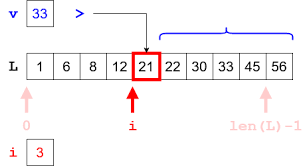

> Also named binary search. 
>
> Principle of research:
> - 1. the list is ordered
> - As long as the element was not found:
     > - 2. the list is divided into two equal parts.
     > - 3. we test if the extreme value of the 1st list corresponds to the searched value
     > - 4. If the test is positive --> STOP
     > - 5. If the test is negative, we seek in which of the two parts of the list the element is found
     > - 6. start again from 2.
>

In [35]:
def dichotomous_search(liste, valeur):
    first = 0
    last  = len(liste)-1
    index = -1
    count = 0
    while (first <= last) and (index == -1):
        count += 1
        mid = (first+last)//2 # La liste est découpée en deux
        if liste[mid] == valeur: # On regarde si la valeur extrème de la liste correspond a la valeur, STOP
            index = mid
        else:
            # Search for array in which element stands in.
            if valeur < liste[mid]:
                last = mid -1
            else:
                first = mid +1
    #print("nombre d'itérations:",count)
    return index

> This search requires ordering the elements of an array. The ordering algorithm needs to be taken into account in order to assess the time consumed by algorithm.

In [36]:
len(liste_test)

1000000

In [37]:
%time liste_ordonnee = sorted(liste_test)

CPU times: total: 266 ms
Wall time: 271 ms


In [38]:
liste_ordonnee[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [39]:
%time dichotomous_search(liste_ordonnee, element)

CPU times: total: 0 ns
Wall time: 0 ns


124327

> While taking into account all involved algorithms

In [40]:
%time dichotomous_search(sorted(liste_test),element)

CPU times: total: 281 ms
Wall time: 275 ms


124327

## <font color='blus'>Representation of the complexity of an algorithm

We can carry out an experimental study of the complexity of a search algorithm in a list, by varying the size of the lists analyzed and calculating the average CPU calculation time and by graphically representing this calculation time as a function of the size of the lists analyzed.

### <font color='blus'>Implementation of the measure

In [42]:
M = 1000
ELT = 500
"dichotomous_search(liste_ordonnee[:{}],{})".format(M, ELT)

'dichotomous_search(liste_ordonnee[:1000],500)'

In [43]:
M   = 1000
ELT = 500
N   = 100
# The statement that will be executed for the measurement
statement = "dichotomous_search(liste_ordonnee[:{}],{})".format(M, ELT)

# import of the functions and data necessary for the execution of the instruction.
# Note that __main__ instructs Python interpreter that the notebook is the entry point.
setup = "from __main__ import dichotomous_search, liste_ordonnee"

# Instantiating the Timer Object (see OOP session)
oTimer = Timer(statement, setup)

# Measurement of the elapsed time for the instruction executed N times having the an average for each data size.
oTimer.timeit(number=N)

0.0008173999999598891

### <font color='blus'>Measuring the complexity of the `dichotomous search` algorithm

> We are going to repeat the measure implemented previously on a list of increasing size.
>
> We will obtain a representation of time according to the size of the data, $t=f(size)$.

In [44]:
%%time
list_computation_time = []
elt = 500
N = 5
for m in range(1000):
    M = 1000*(m+1)# The size of the array ranges from 1OOO to 1000001
    t = Timer('''dichotomous_search(liste_ordonnee[:{}],{})'''.format(M, elt),
              "from __main__ import dichotomous_search, liste_ordonnee")
    list_computation_time.append(t.timeit(number=N))# N repetitions of the algorithm for each size of the array.

CPU times: total: 1min 2s
Wall time: 1min 3s


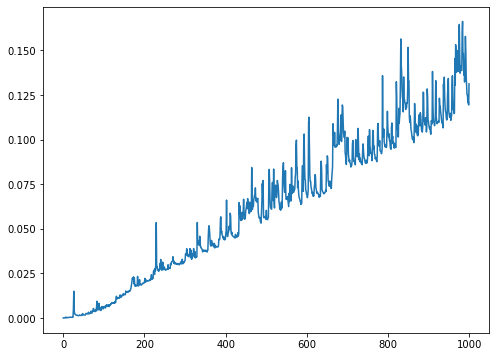

In [45]:
plt.figure(figsize=(8,6))
list_x = range(1000)
list_y = list_computation_time
plt.plot(list_x, list_y);

> The graph can be approximated as a straight line; the algorithm is said to have linear complexity. The computation time linearly depends on the size of the data.
>
> This would not be the case for an algorithm with a double loop, for example. The dependency would be like the power of two of the data size.

## <font color='blus'>Sorting algorithms

### <font color='blus'>Sorting algorithms from `numpy`

Sort of a list with numpy:

`quicksort`: quick sort (default `kind = 'quicksort'`)

`heapsort`: sort (by comparison) by heap

`mergesort`: merge sort

`timsort`: hybrid sort derived from merge sort and insertion sort

In [46]:
len(test_nparray)

1000000

In [47]:
for kind in {'quicksort', 'mergesort', 'heapsort', 'stable'}:# NB : ths is a set
    print(kind)
    %time np.sort(test_nparray, kind=kind)

heapsort
CPU times: total: 141 ms
Wall time: 151 ms
mergesort
CPU times: total: 62.5 ms
Wall time: 68.7 ms
stable
CPU times: total: 62.5 ms
Wall time: 71.8 ms
quicksort
CPU times: total: 62.5 ms
Wall time: 67.3 ms


In [48]:
import random as rd

In [49]:
LIST_SIZE = 10000
list_ = [i for i in range(0,LIST_SIZE)]
# The list is shuffled for the sort to be valid
liste_a_trier = rd.shuffle(list_)
liste_a_trier = list_
print(len(liste_a_trier), type(liste_a_trier))

10000 <class 'list'>


### <font color='blus'>Bubble sort

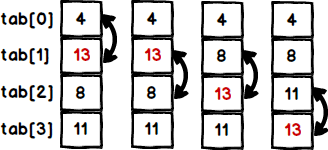

> Bubble sorting consists of traversing the table, for example from left to right, comparing the elements side by side and swapping them if they are not in the correct order.
>
> During a pass of the painting, the largest elements rise gradually to the right like bubbles towards the surface.

In [50]:
list_ = [i for i in range(0,LIST_SIZE)]
liste_a_trier = rd.shuffle(list_)
liste_a_trier = list_

len(liste_a_trier)

10000

In [51]:
liste_a_trier[:None] # Liste entière
liste_a_trier[-2-1]  # Element en 3eme position a partir de la fin de la liste

4247

In [52]:
M = None
len(liste_a_trier[:-1])

9999

> L'implementation est une forme de tri par selection en partant de la fin de la liste.
>
> Partir de la fin impose de rechercher la valeur max de la liste à positioner en fin de liste.

In [53]:
def bubble_sort(liste):
    for i,_ in enumerate(liste):
        # We consider all the elements of the list except the last ones
        # If i is 0, we take the whole list.
        # We get the max value of this list.
        val_max = max(liste[:(-i if i else None)]) # NB: liste[:0] == [] vs liste[:None] == liste
        
        # We get the index of the max value of the truncated list
        ind_val_max = liste.index(val_max)
        
        # The previous -i value and the max value are swapped; the max remote value therefore in the truncated list        liste[-i-1],liste[ind_val_max] = liste[ind_val_max],liste[-i-1]
    return liste

In [54]:
%time liste_triee = bubble_sort(liste_a_trier)

CPU times: total: 2.22 s
Wall time: 2.34 s


### <font color='blus'>Insertion sort

![alt text](http://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif)

In [55]:
def insertion_sort1(data):
    for r in range(1, len(data)):
        for l in range(r):
            if data[r] < data[l]:
                temp = data[r]
                data[l+1:r+1] = data[l:r]
                data[l] = temp
    return data

In [56]:
%time liste_triee = insertion_sort1(liste_a_trier)

CPU times: total: 3.72 s
Wall time: 3.76 s


#### <font color='blus'>Some tricks to know

In [57]:
np_ar1 = np.array([1,2,4,5,6])
print(np_ar1)
np_ar_bool = np_ar1 <= 3
print(np_ar_bool)

[1 2 4 5 6]
[ True  True False False False]


> `argmin` will return the index (the list argument) corresponding to the smallest value.
>
> We recover the index of the smallest value <=3, it is the 1st index to False.

In [58]:
(np_ar1 <= 3).argmin()

2

In [59]:
ind_insert= (np_ar1 <= 3).argmin()
ind_insert

2

> Array to be sorted is splited into three parts and is rebuilt using concatenation from numpy `np.concatenate` 
>
> Array partitions are : 
>> - The `True` values part that satisfies condition array <= value_to_be_inserted
>> - The `False` values part that matches with condition array > value_to_be_inserted
>> - The part composed of a single element, value_to_be_inserted (3 here below) matching with element where split takes place.

In [60]:
# Numpy arrays concatenation
np.concatenate( (np_ar1[:ind_insert],np_ar1[ind_insert:ind_insert],np_ar1[ind_insert:]) )

array([1, 2, 4, 5, 6])

> NB : concatenation takes place for arrays. 
> - `np_ar1[ind_insert]` is a value
> - `np_ar1[ind_insert:ind_insert]` is a numpy array

In [61]:
# In the example below, the returned value does not matches with a deterministic value in the sense where the value 8
# does not exists in the array.
(np_ar1 <= 8).argmin() # il faudra traiter ce cas séparément

0

> Building unsorted list that aims to be sorted.

In [62]:
list_shuffled = [i for i in range(0,LIST_SIZE)]
rd.shuffle(list_shuffled)
len(list_shuffled), list_shuffled[23:33]

(10000, [5003, 1061, 4500, 3959, 6169, 6395, 3690, 4228, 4818, 7066])

In [63]:
from typing import List
def insertion_sort(list_for_sorting): 
    # Initialization of the array to be sorted that includes the 1st element of the array
    np_sorted = np.array(list_for_sorting[:1])
    
    for i,elt in enumerate(list_for_sorting[1:]): 
        j = i+1 # Shift indice because liste[1:] is traversed
        if elt >= np_sorted.max():
            # Add the greatest element at the end of the list
            np_sorted = np.concatenate( (np_sorted[:j],[elt]) )
        else:
            # Element has to be inserted in the sorted list at the right place
            # Search for first smaller element in the sorted list : search for 
            # the smallest element in the sorted array.
            index_of_smallest_elt = (np_sorted[:j] <= elt).argmin()
            
            # Add the element just after values limited with this smallest element
            np_sorted = np.concatenate( (np_sorted[:index_of_smallest_elt], [elt], np_sorted[index_of_smallest_elt:j]) )
    return np_sorted

In [64]:
%time liste_sorted = insertion_sort(list_shuffled)

CPU times: total: 234 ms
Wall time: 226 ms


In [65]:
liste_sorted[-10:]

array([9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999])

> Numpy's `max` method makes the performance difference with Python's standard `max` method.

### <font color='blus'>Comparative study of complexity in time

> The device implemented is identical to that seen previously for `Time measurement of the complexity of an algorithm`
>
> The device will be applied to three algorithms, the measurements will be recorded for each of them and compared on a graph.

In [66]:
LIST_SIZE = 1000

In [67]:
n = int(1e3)
liste_1 = [i for i in range(0,LIST_SIZE)]
rd.shuffle(liste_1)
liste_2 = liste_1.copy()
liste_3 = liste_1.copy()

In [68]:
time_insertion = []
for m in range(100):
    M = 10*(m+1)
    t = Timer('''insertion_sort(liste_2[:{}])'''.format(M),
              "from __main__ import insertion_sort, liste_2")
    time_insertion.append(t.timeit(number=10))

In [69]:
time_insertion1 = []
for m in range(100):
    M = 10*(m+1)
    t = Timer('''insertion_sort1(liste_2[:{}])'''.format(M),
              "from __main__ import insertion_sort1, liste_2")
    time_insertion1.append(t.timeit(number=10))

In [70]:
time_bubble = []
for m in range(100):
    M = 10*(m+1)
    t = Timer('''bubble_sort(liste_3[:{}])'''.format(M),
              "from __main__ import bubble_sort, liste_3")
    time_bubble.append(t.timeit(number=10))

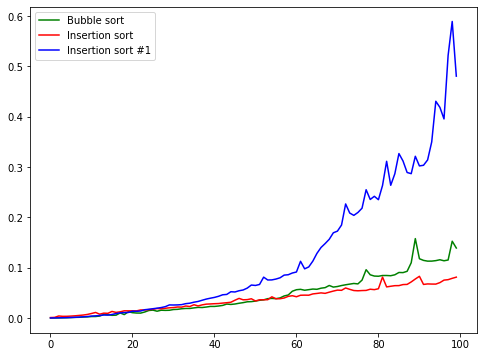

In [71]:
%matplotlib inline
x = range(100)
plt.figure(figsize=(8,6))
plt.plot(x, time_bubble, 'g', label='Bubble sort')
plt.plot(x, time_insertion, 'r', label='Insertion sort')
plt.plot(x, time_insertion1, 'b', label='Insertion sort #1')
plt.legend();

> insertion_sort1 algorithm has $O(t^2)$ time-complexity. This is due to double loop implementation.

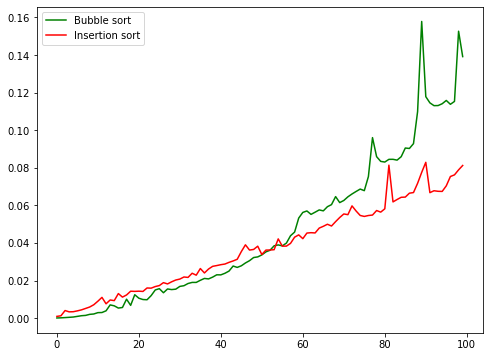

In [72]:
%matplotlib inline
x = range(100)
plt.figure(figsize=(8,6))
plt.plot(x, time_bubble, 'g', label='Bubble sort')
plt.plot(x, time_insertion, 'r', label='Insertion sort')
plt.legend();

In [114]:
n = int(1e3)
liste_1 = [i for i in range(0,LIST_SIZE)]
rd.shuffle(liste_1)
liste_2 = liste_1.copy()
liste_3 = liste_1.copy()
liste_4 = liste_1.copy()

In [115]:
time_insertion = []
for m in range(1000):
    M = 1*(m+1)
    t = Timer('''insertion_sort(liste_2[:{}])'''.format(M),
              "from __main__ import insertion_sort, liste_2")
    time_insertion.append(t.timeit(number=10))

In [116]:
time_bubble = []
for m in range(1000):
    M = 1*(m+1)
    t = Timer('''bubble_sort(liste_3[:{}])'''.format(M),
              "from __main__ import bubble_sort, liste_3")
    time_bubble.append(t.timeit(number=10))

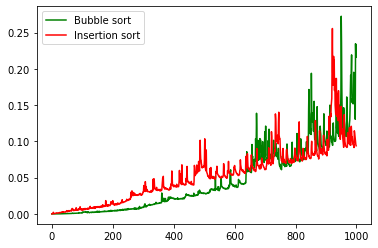

In [76]:
x = range(1000)
plt.figure(figsize=(8,6))
%matplotlib inline
plt.plot(x, time_bubble, 'g', label='Bubble sort')
plt.plot(x, time_insertion, 'r', label='Insertion sort')
plt.legend();

# <font color='blus'>Exercises

## <font color='blus'>Exercise 1

> On the graph above, how would you qualify (linearity,...) each one of the time algoritms complexity ?

## <font color='blus'>Exercise 2

### <font color='blus'>Sort by selection on a list

> The principle consists of selecting the smallest value from the list and exchanging this value with the 1st value from the list, redoing this operation with the private list of the 1st value.
>
> - The list does not need to be ordered. 
> - We also note the absence of a test which bodes well for good performance.
> - This algorithm uses the `min` method from list that implements an optimized algorithm.
>
>Algorithm
> - 1 Traverse all `i` indices in the list
>> - 1.1 Finding the minimum value of `list[i:]`, list starting at index `i`
>> - 1.2 The `list[i]` value are swapped with the minimum value
>> - 1.3 Go to 1.1

In [ ]:
from typing import List
def insertion_sort(list_for_sorting): 
    # Initialization of the array to be sorted that includes the 1st element of the array
    np_sorted = np.array(list_for_sorting[:1])
    
    for i,elt in enumerate(list_for_sorting[1:]): 
        j = i+1 # Shift indice because liste[1:] is traversed
        if elt >= np_sorted.max():
            # Add the greatest element at the end of the list
            np_sorted = np.concatenate( (np_sorted[:j],[elt]) )
        else:
            # Element has to be inserted in the sorted list at the right place
            # Search for first smaller element in the sorted list : search for 
            # the smallest element in the sorted array.
            index_of_smallest_elt = (np_sorted[:j] <= elt).argmin()
            
            # Add the element just after values limited with this smallest element
            np_sorted = np.concatenate( (np_sorted[:index_of_smallest_elt], [elt], np_sorted[index_of_smallest_elt:j]) )
    return np_sorted

In [93]:
import typing
from typing import List

size = 10**4
list_1 = [i for i in range(0,size)]
rd.shuffle(list_1)
list_train = list_1.copy()

def selection_sort(list_for_sorting:list) -> list:
    #Initialization
    list_sorted = [len(list_for_sorting)]
    tmp = min(list_for_sorting)
    list_sorted[0] = tmp
    list_for_sorting.remove(tmp)
    i= 1
    for i in enumerate(list_for_sorting):
        tmp = min(list_for_sorting)
        list_sorted.append(tmp)
        list_for_sorting.remove(tmp)
    return list_sorted

%time list_result = selection_sort(list_train)

list_result[105]




CPU times: total: 812 ms
Wall time: 811 ms


105

In [95]:
list_train
print(1)

1


In [74]:
time_insertion = []
for m in range(1000):
    M = 1*(m+1)
    t = Timer('''insertion_sort(liste_2[:{}])'''.format(M),
              "from __main__ import insertion_sort, liste_2")
    time_insertion.append(t.timeit(number=10))

In [110]:
time_selection = []
for m in range(1000):
    M = 1*(m+1)
    t = Timer('''selection_sort(liste_4[:{}])'''.format(M),
              "from __main__ import selection_sort, liste_4")
    time_selection.append(t.timeit(number=10))

In [112]:
len(time_selection)

1000

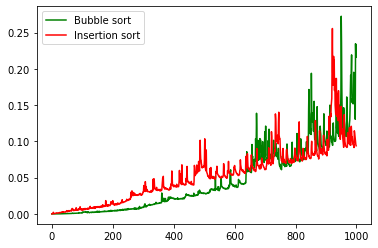

In [76]:
x = range(1000)
plt.figure(figsize=(8,6))
%matplotlib inline
plt.plot(x, time_bubble, 'g', label='Bubble sort')
plt.plot(x, time_insertion, 'r', label='Insertion sort')
plt.legend();

In [107]:
len(x),len(time_selection)

(1000, 0)

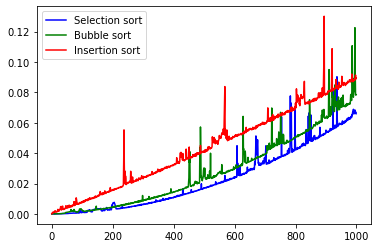

In [117]:
x = range(1000)
plt.figure(figsize = (8,6))
%matplotlib inline
plt.plot(x, time_selection,'b',label = 'Selection sort')
plt.plot(x, time_bubble, 'g', label='Bubble sort')
plt.plot(x, time_insertion, 'r', label='Insertion sort')
plt.legend();

> 2.1 With the **dynamic programming** method, draw the sort algorithm.

> 2.2 Write a function that implements such algorithm.

> 2.3 Test the function with a random sample range of indices

> 2.4 Evaluate its complexity in time

> 2.5 represent the time-complexity sort algorithm on a graph with a sample of 1000 points

> 2.6 Compare on a same graph, this time-complexity with previous algorithms viewed during this session

> 2.7 Which one of the algorithms should you select for the sort task?